In [1]:
# This code cell will not be shown in the HTML version of this notebook
#imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
import matplotlib.pyplot as plt
from mlrefined_libraries import calculus_library as calclib

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

In [2]:
class MyTuple:
    '''
    The basic object representing the input variable 'w'
    represents the core of our AD calculator.  An instance 
    of this class is a tuple containining one function/derivative
    evaluation of the variable 'w'.  Because it is meant to 
    represent the simple variable 'w' the derivative 'der' is
    preset to 1.  The value 'val' can be set to 0 by default.  
    '''
    def __init__(self,**kwargs):
        # variables for the value (val) and derivative (der) of our input function 
        self.val = 0
        self.der = 1    
        
        # re-assign these default values 
        if 'val' in kwargs:
            self.val = kwargs['val']
        if 'der' in kwargs:
            self.der = kwargs['der']   
            
    # our implementation of the addition rules from Table 2
    def __mul__(self,a,b):
        # Create output evaluation and derivative object
        c = MyTuple()

        # switch to determine if a or b is a constant
        if type(a) != MyTuple:
            c.val = a*b.val
            c.der = a*b.der
        elif type(b) != MyTuple:
            c.val = a.val*b
            c.der = a.der*b
        else: # both inputs are MyTuple objects
            c.val = a.val*b.val
            c.der = a.der*b.val + a.val*b.der     # product rule

        # Return updated object
        return c
    
    def __rmul__(self,a,b):
        return self.mul(b,a)

    # our implementation of the addition rules from Table 2
    def __add__(self,a,b):
        # Create output evaluation and derivative object
        c = MyTuple()

        # switch to determine if a or b is a constant
        if type(a) != MyTuple:
            c.val = a + b.val
            c.der = b.der
        elif type(b) != MyTuple:
            c.val = a.val + b
            c.der = a.der
        else: # both inputs are MyTuple objects
            c.val = a.val + b.val
            c.der = a.der + b.der

        # Return updated object
        return c
    
    def __radd__(self,a,b):
        return self.add(b,a)

    # our implementation of the addition rules from Table 2
    def __sub__(self,a,b):
        # Create output evaluation and derivative object
        c = MyTuple()

        # switch to determine if a or b is a constant
        if type(a) != MyTuple:
            c.val = a - b.val
            c.der = b.der
        elif type(b) != MyTuple:
            c.val = a.val - b
            c.der = a.der
        else: # both inputs are MyTuple objects
            c.val = a.val - b.val
            c.der = a.der - b.der

        # Return updated object
        return c
    
    def __rsub__(self,b,a):
        return self.sub(a,b)
    
    # our implementation of the power rule from Table 1 
    def __pow__(self,a,n):
        # Create output evaluation and derivative object
        b = MyTuple()

        # Produce new function value - once '**' is overloaded this line will be recursive for MyTuple objects
        b.val = a.val**n

        # Produce new derivative value - once '**' is overloaded this line will be recursive for MyTuple objects
        b.der = n*(a.val**(n-1))*a.der

        # Return updated object
        return b

    # define negation
    def __neg__(self,a):
        # Create output evaluation and derivative object
        b = MyTuple()
        b.val = -a.val
        b.der = -a.der
        return b

In [3]:
# make element capable or desired order calculations, will contain the function value as well as every derivative value up to and equal n         
def choose_order(order,**kwargs):
    # initialize first 
    w = MyTuple()
    if 'val' in kwargs:
        w = MyTuple(val = kwargs['val'])

    # recurse to create higher order derivative object
    for r in range(order-1):
        w = MyTuple(val = w)
    return(w)   

In [4]:
# our homemade sine function - made general to accept a function as input (hence the explicit application of the chain rule)
def sin(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # check if .val is constant, then last derivative to evaluate
    if type(a.val) != MyTuple:        
        # Calculate new current value
        b.val = np.sin(a.val)

        # Calculate new current derivative value
        b.der = np.cos(a.val)*a.der
    else:  # the new recursive branch
        # Calculate new current value
        b.val = sin(a.val)

        # Calculate new current derivative value
        b.der = cos(a.val)*a.der

    # Return updated object
    return b

# our homemade sine function - made general to accept a function as input (hence the explicit application of the chain rule)
def cos(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # check if .val is constant, then last derivative to evaluate
    if type(a.val) != MyTuple:        
        # Calculate new current value
        b.val = np.cos(a.val)

        # Calculate new current derivative value
        b.der = -np.sin(a.val)*a.der
    else:
        # Calculate new current value
        b.val = cos(a.val)

        # Calculate new current derivative value
        b.der = -sin(a.val)*a.der

    # Return updated object
    return b

# our implementation of the power rule from Table 1 
def tanh(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # check if .val is constant, then last derivative to evaluate
    if type(a.val) != MyTuple:        
        # Calculate new current value
        b.val = np.tanh(a.val)

        # Calculate new current derivative value
        b.der = (1 - np.tanh(a.val)**2)*a.der
    else:    # the recursive branch
        # Calculate new current value
        b.val = tanh(a.val)

        # Calculate new current derivative value
        b.der = (1 - tanh(a.val)**2)*a.der
    
    # Return updated object
    return b

In [ ]:
# a short function for plotting function and derivative values over a large range for input function g
def generate_taylor(g,**kwargs):
    # specify range of input for our function and its derivative
    w = np.linspace(-3,3,1000) 
    if 'w' in kwargs:
        w = kwargs['w']
  
    # recurse to create higher order derivative object
    order = 1
    if 'order' in kwargs:
        order = kwargs['order']
    
    # initialize objects
    valder_objs = []
    for u in w:
        # loop over and make deep object for higher order derivatives
        s = MyTuple(val = u)
        for i in range(order-1):
            s = MyTuple(val = s)
        valder_objs.append(s)

    # collect function and derivative values to plot
    results = [g(w) for w in valder_objs]
    
    # loop over and collect final derivative value
    g = []
    dgdw = []
    for r in results:
        val = r.val
        der = r.der
        for i in range(order-1):
            val = val.val
            der = der.der
        g.append(val)
        dgdw.append(der)

    # generate original function
    function_table = np.stack((w,g), axis=1) 

    # generate derivative function
    derivative_table = np.stack((w,dgdw), axis=1) 

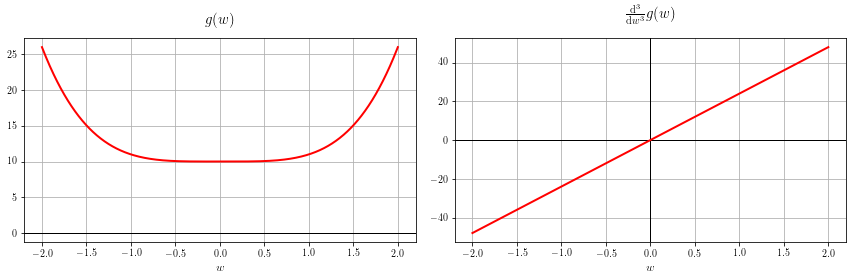

In [13]:
# create instance of our function to differentiate - notice this uses our homemade sine function not numpy's
g = lambda w: w**4 + 10
w = np.linspace(-2,2,1000)

# use the custom plotting function above to plot over a large range of inputs
calclib.plotter.ad_derval_plot(MyTuple,g,w=w,order=3)

In [17]:
# create instance of our function to differentiate - notice this uses our homemade sine function not numpy's
g = lambda w: tanh(w**2)
w = np.linspace(-5,5,1000)

# use the custom plotting function above to plot over a large range of inputs
calclib.plotter.ad_derval_plot(MyTuple,g,w=w,order=4)

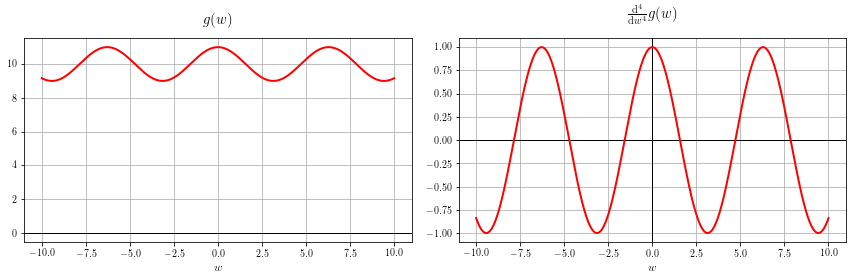

In [18]:
# create instance of our function to differentiate - notice this uses our homemade sine function not numpy's
g = lambda w: cos(w) + 10
w = np.linspace(-10,10,1000)

# use the custom plotting function above to plot over a large range of inputs
calclib.plotter.ad_derval_plot(MyTuple,g,w=w,order=4)

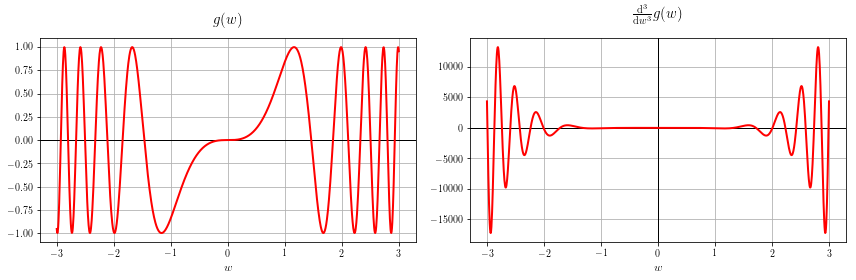

In [19]:
# create instance of our function to differentiate - notice this uses our homemade sine function not numpy's
g = lambda w: sin(w**3)
w = np.linspace(-3,3,1000)

# use the custom plotting function above to plot over a large range of inputs
calclib.plotter.ad_derval_plot(MyTuple,g,w=w,order=3)

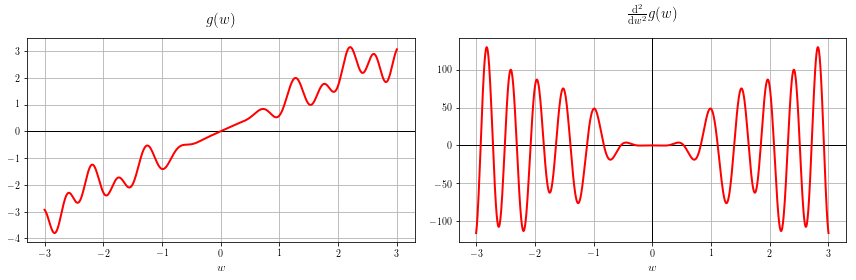

In [20]:
# create instance of our function to differentiate - notice this uses our homemade sine function not numpy's
g = lambda w: sin(w**2)*tanh(w)**2*cos(10*w) + w
w = np.linspace(-3,3,1000)

# use the custom plotting function above to plot over a large range of inputs
calclib.plotter.ad_derval_plot(MyTuple,g,w=w,order=2)